# Разведывательный анализ данных (EDA)
## Основные цели и задачи проекта:
- Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
- Выявить значимые параметры влияющие, на итоговую оценку.


### Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

### Настроим отображение данных

In [2]:
pd.set_option('display.max_rows', 50)  # выведем больше строк
pd.set_option('display.max_columns', 50)  # выведем больше колонок

## Описание признаков (дано)
- 1 school — аббревиатура школы, в которой учится ученик
- 2 sex — пол ученика ('F' - женский, 'M' - мужской)
- 3 age — возраст ученика (от 15 до 22)
- 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
- 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
- 16 schoolsup — дополнительная образовательная поддержка (yes или no)
- 17 famsup — семейная образовательная поддержка (yes или no)
- 18 paid — дополнительные платные занятия по математике (yes или no)
- 19 activities — дополнительные внеучебные занятия (yes или no)
- 20 nursery — посещал детский сад (yes или no)
- 21 higher — хочет получить высшее образование (yes или no)
- 22 internet — наличие интернета дома (yes или no)
- 23 romantic — в романтических отношениях (yes или no)
- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- 28 absences — количество пропущенных занятий
- 29 score — баллы по госэкзамену по математике

### Загрузим данные

In [3]:
df = pd.read_csv('stud_math.csv')

## Предварительный анализ дата фрейма

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

**Выводы**
- Признак "studytime, granular" - нет расшифровки в задании.

**Типы данных:**
- float64(12) - 12 числовых столбцов float64.
- int64(1) - 1 числовой столбец int64.
- object(17) - 17 категориальных признаков.

## Загрузим необходимые функции
### Функция для построения boxplot

In [6]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

### Функция для замены пустых ячеек на 'empty'
Выделение отдельной категории "не определено" или замена пропусков строкой типа "данные отсутствуют" - варианты замены пропусков. Чтобы в некоторых случаях можно было построить дополнительных boxplot по незаполненным ячейкам и посмотреть, как незаполненные данные потенциально влияют на итоговое значение.

In [7]:
def empty_change(column):
    df[column] = df[column].apply(lambda x: 'empty' if pd.isnull(x) else x)

### Тест Стьюдента

In [8]:
def student_test(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### Функция расчета количества пустых ячеек

In [9]:
def empty_count(column):
    count_cell = len(df[column])
    empty_cell = df[column].isnull().sum()
    print('Параметр - {}'.format(column))
    print('Всего значений - {}'.format(count_cell))
    print('Заполненных значений - {}'.format(count_cell - empty_cell))
    print('Пустых значений - {}'.format(empty_cell))
    print('Пустых значений - {}%'.format(round(empty_cell / count_cell * 100, 2)))

## Последовательно проверим все признаки
### Основной столбец score

Начнем с него, т. к. данный параметр является целевым.

In [10]:
empty_count('score')

Параметр - score
Всего значений - 395
Заполненных значений - 389
Пустых значений - 6
Пустых значений - 1.52%


Cтроки с пустыми значениями в колонке score нужно убрать, т. к. анализируем датасет относительно данной колонки:

In [11]:
df = df.dropna(subset=['score'], axis=0).reset_index(drop=True)

**Посмотрим детально**

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

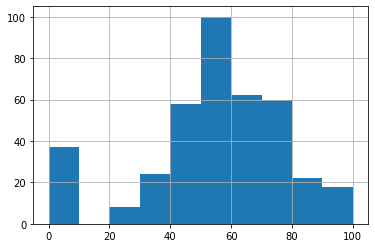

In [12]:
df.score.hist()
df.score.describe()

**Выводы:**
- Значения распределены между 20 и 100. Есть выброс - значение 0 (скорее всего эти люди не сдавали экзамен, иначе были бы оценки между 0 и 20).
- Возможно, также, что методика оценки подразумевает ставить 0, если набрано менее 20 баллов, но нам об этом неизвестно.
- Удалим строки с нулевыми оценками из анализа:

In [13]:
df = df[df.score != 0].reset_index(drop=True)

### 1 school — аббревиатура школы, в которой учится ученик

In [14]:
df.school.value_counts()

GP    311
MS     41
Name: school, dtype: int64

**Построим boxplot**

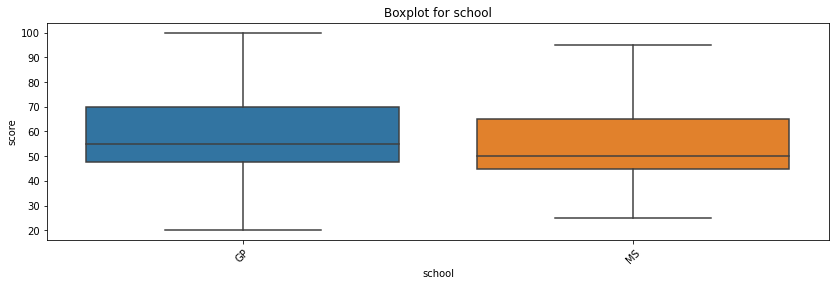

In [15]:
get_boxplot('school')

**Предварительный вывод:**

В датасете 2 школы
- GP 311
- MS 41


- Пустых значений нет
- В школе GP выше разброс оценок, но общий уровень подготовки выше, чем в школе MS

### 2 sex — пол ученика ('F' - женский, 'M' - мужской)

In [16]:
df.sex.value_counts()

F    182
M    170
Name: sex, dtype: int64

**Построим boxplot**

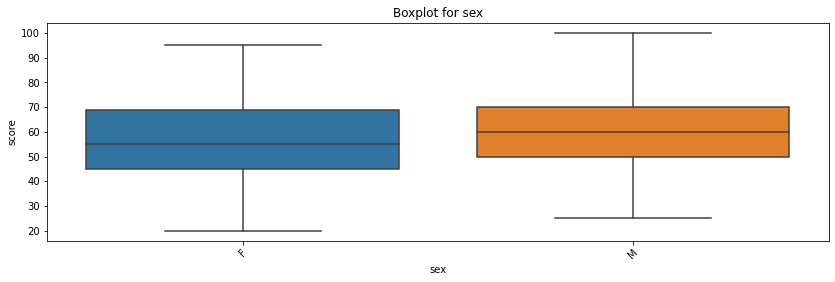

In [17]:
get_boxplot('sex')

**Предварительный вывод:**
- F	182
- M	170


- Пустых значений нет.
- Мальчики в среднем лучше сдают экзамен по математике.

### 3 age — возраст ученика (от 15 до 22)
В колонке представлены дискретные значения возраста (8 значений от 15 до 22), поэтому пока посмотрим на данные, как на номинативные переменные

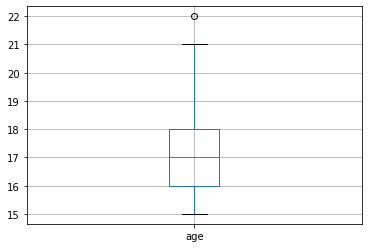

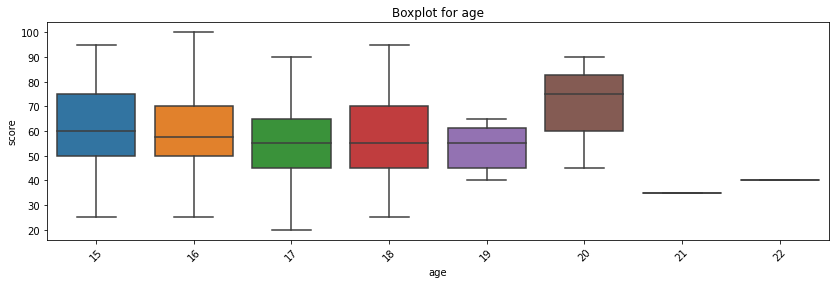

In [18]:
df.boxplot(column=['age'])
get_boxplot('age')

**Предварительный вывод:**

- Пустых значений нет.
- Средний уровень оценок снижается с 15 до 17 лет (в 17 лет в среднем экзамен сдают хуже), с 18 до 20 лет ср уровень оценок повышается. В 20 лет максимальный уровень оценок.
- Есть выбросы, удалим их из анализа:

In [19]:
df = df.loc[df.age.between(15, 20)].reset_index(drop=True)

### 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
**Проверим пропуски**

In [20]:
empty_count('address')


Параметр - address
Всего значений - 350
Заполненных значений - 336
Пустых значений - 14
Пустых значений - 4.0%


**Посмотрим на категории**

In [21]:
empty_change('address')
df.address.value_counts()

U        264
R         72
empty     14
Name: address, dtype: int64

**Построим boxplot**

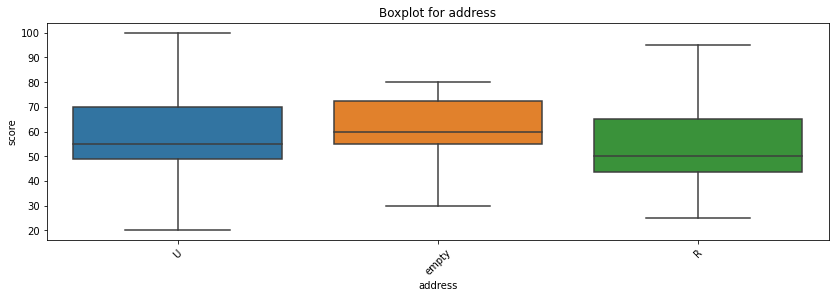

In [22]:
get_boxplot('address')

**Предварительный вывод:**
- Непустые значения 336 из 350. 4% - пустых значений.
- Пока очевидных выводов по данной колонке нет

### 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
**Проверим пропуски**

In [23]:
empty_count('famsize')

Параметр - famsize
Всего значений - 350
Заполненных значений - 326
Пустых значений - 24
Пустых значений - 6.86%


**Посмотрим на категории**

In [24]:
empty_change('famsize')
df.famsize.value_counts()

GT3      226
LE3      100
empty     24
Name: famsize, dtype: int64

**Построим boxplot**

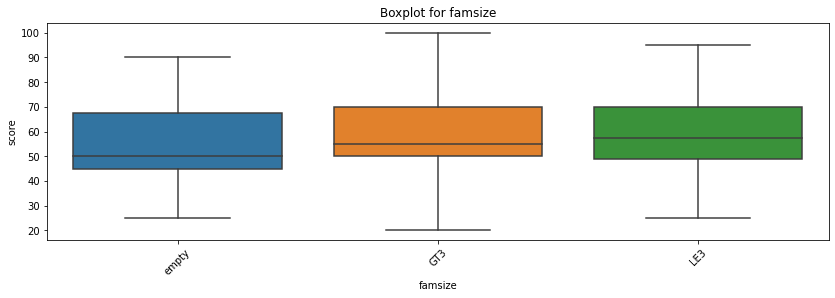

In [25]:
get_boxplot('famsize')

**Предварительный вывод:**
- Непустые значения 326 из 350. 6.86% - пустых значений.
- Пока очевидных выводов по данной колонке нет

### 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
**Проверим пропуски**

In [26]:
empty_count('Pstatus')

Параметр - Pstatus
Всего значений - 350
Заполненных значений - 309
Пустых значений - 41
Пустых значений - 11.71%


**Посмотрим на категории**

In [27]:
empty_change('Pstatus')
df.Pstatus.value_counts()

T        275
empty     41
A         34
Name: Pstatus, dtype: int64

**Построим boxplot**

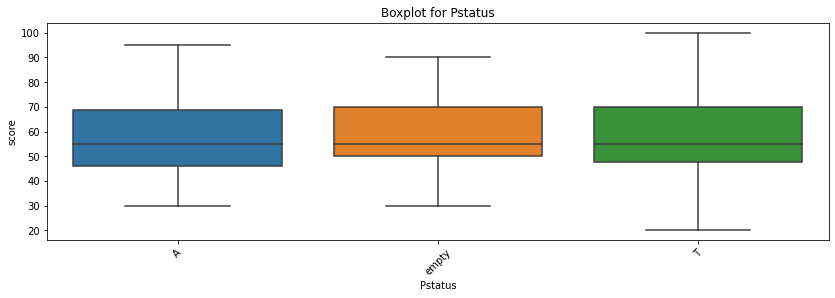

In [28]:
get_boxplot('Pstatus')

**Предварительный вывод:**
- Непустые значения 309 из 350. 11.7% - пустых значений.
- T 275
- empty 41
- A 34


**Выводы:**
- Много незаполненных данных (больше, чем одна из двух заполненных групп).
- Диаграмма показывает, что данный параметр практически не влияет на итоговый результат.
- Столбец можно удалить:

In [29]:
df.drop(['Pstatus'], inplace=True, axis=1)

### 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
**Проверим пропуски**

In [30]:
empty_count('Medu')

Параметр - Medu
Всего значений - 350
Заполненных значений - 348
Пустых значений - 2
Пустых значений - 0.57%


**Посмотрим на категории**

In [31]:
df.Medu.value_counts()

4.0    125
2.0     88
3.0     86
1.0     46
0.0      3
Name: Medu, dtype: int64

**Построим boxplot**

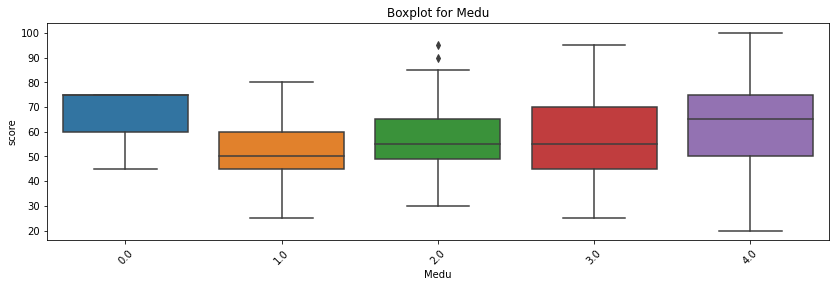

In [32]:
get_boxplot('Medu')

**Предварительный вывод:**
- Непустые значения 348 из 350. 0.57% - пустых значений (мало, можно их не учитывать)
- Есть выбросы в значении 2.0
- Пока очевидных выводов по данной колонке нет.

### 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))
**Проверим пропуски**

In [33]:
empty_count('Fedu')

Параметр - Fedu
Всего значений - 350
Заполненных значений - 329
Пустых значений - 21
Пустых значений - 6.0%


**Посмотрим на категории**

In [34]:
df.Fedu.value_counts()

2.0     94
3.0     89
4.0     80
1.0     63
0.0      2
40.0     1
Name: Fedu, dtype: int64

Значение 40.0 - 1 - ошибка в датасете, скорее всего имелось в виду 4.

**Исправим ошибку:**

In [35]:
df.at[df[df.Fedu == 40]['Fedu'].index[0], 'Fedu'] = 4
df.Fedu.value_counts()

2.0    94
3.0    89
4.0    81
1.0    63
0.0     2
Name: Fedu, dtype: int64

**Построим boxplot**

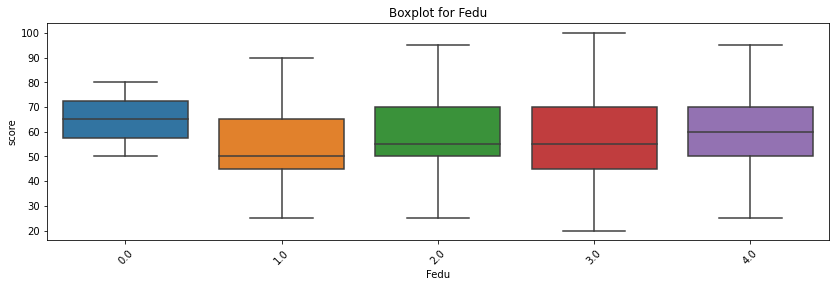

In [36]:
get_boxplot('Fedu')

**Предварительный вывод:**
- Устранили ошибку.
- Непустые значения 329 из 350. 6% - пустых значений.
- Пока очевидных выводов по данной колонке нет

### 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
**Проверим пропуски**

In [37]:
empty_count('Mjob')

Параметр - Mjob
Всего значений - 350
Заполненных значений - 333
Пустых значений - 17
Пустых значений - 4.86%


**Посмотрим на категории**

In [38]:
empty_change('Mjob')
df.Mjob.value_counts()

other       114
services     89
teacher      51
at_home      49
health       30
empty        17
Name: Mjob, dtype: int64

**Построим boxplot**

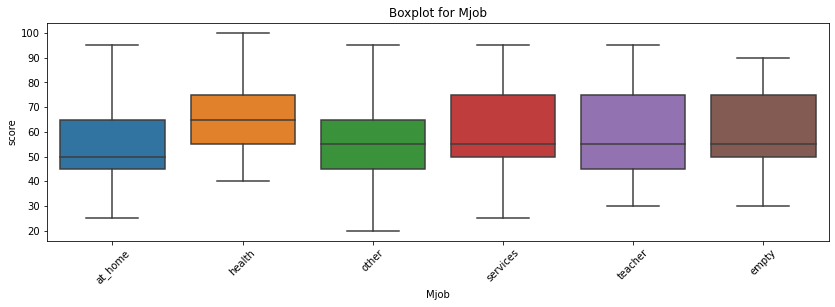

In [39]:
get_boxplot('Mjob')

**Предварительный вывод:**
- Уровень сдачи экзамена в среднем самый высокий, если сфера работы матери 'health' - сфера здравоохранение.
- Непустые значения 333 из 350. 4.86% - пустых значений.

### 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
**Проверим пропуски**

In [40]:
empty_count('Fjob')

Параметр - Fjob
Всего значений - 350
Заполненных значений - 318
Пустых значений - 32
Пустых значений - 9.14%


**Посмотрим на категории**

In [41]:
empty_change('Fjob')
df.Fjob.value_counts()

other       175
services     88
empty        32
teacher      26
health       15
at_home      14
Name: Fjob, dtype: int64

**Построим boxplot**

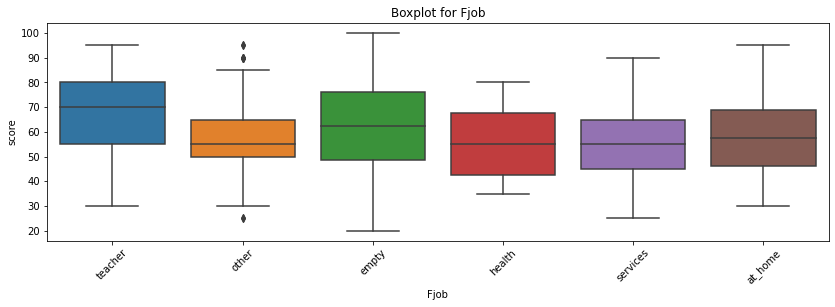

In [42]:
get_boxplot('Fjob')

**Предварительный вывод:**
- Непустые значения 318 из 350. 9.14% - пустых значений.
- Очень много незаполненных значений, но они приблизительно равномерно распределены на всем диапазоне оценок, что не повлияет на анализ, если ими пренебречь.
- В значении 'other' есть выбросы.
- Баллы у учеников, у отца которых образование 'teacher' - учитель, в среднем самые высокие.

### 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
**Проверим пропуски**

In [43]:
empty_count('reason')

Параметр - reason
Всего значений - 350
Заполненных значений - 335
Пустых значений - 15
Пустых значений - 4.29%


**Посмотрим на категории**

In [44]:
empty_change('reason')
df.reason.value_counts()

course        118
reputation     96
home           89
other          32
empty          15
Name: reason, dtype: int64

**Построим boxplot**

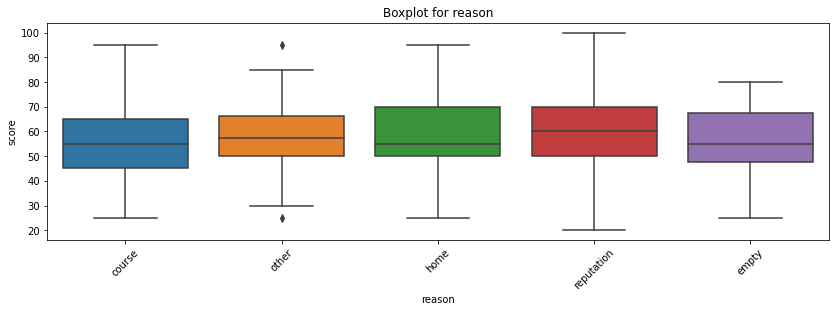

In [45]:
get_boxplot('reason')

**Предварительный вывод:**
- Непустые значения 318 из 350. 4.29% - пустых значений.
- Есть выбросы в значение 'other'.
- Пока очевидных выводов по данной колонке нет.

### 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
**Проверим пропуски**

In [46]:
empty_count('guardian')

Параметр - guardian
Всего значений - 350
Заполненных значений - 322
Пустых значений - 28
Пустых значений - 8.0%


**Посмотрим на категории**

In [47]:
empty_change('guardian')
df.guardian.value_counts()

mother    224
father     78
empty      28
other      20
Name: guardian, dtype: int64

**Построим boxplot**

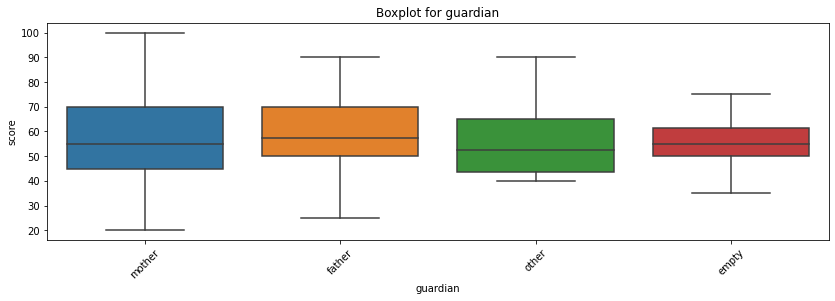

In [48]:
get_boxplot('guardian')

**Предварительный вывод:**
- Непустые значения 322 из 350. 8% - пустых значений.
- Пустых значений хоть и много, в целом не влияют на результат.
- Много значений 'other' - которые непонятно, как интерпретировать. Уровень медианного значения, примерно такой же, но нижняя граница оценок в этой группе выше.
- Если опекун отец, в среднем экзамен сдается лучше и разброс оценок меньше.

### 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
**Проверим пропуски**

In [49]:
empty_count('traveltime')

Параметр - traveltime
Всего значений - 350
Заполненных значений - 327
Пустых значений - 23
Пустых значений - 6.57%


**Посмотрим на категории**

In [50]:
empty_change('traveltime')
df.traveltime.value_counts()

1.0      217
2.0       86
empty     23
3.0       17
4.0        7
Name: traveltime, dtype: int64

**Построим boxplot**

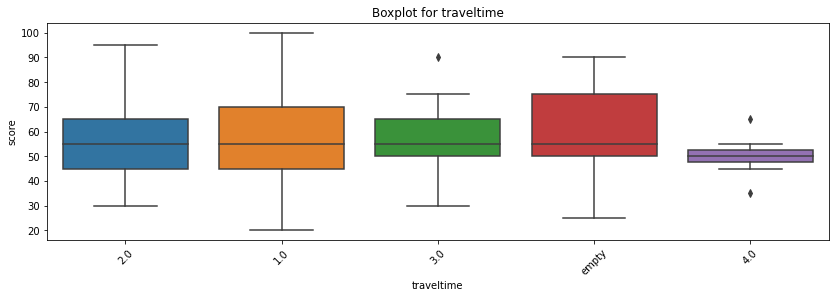

In [51]:
get_boxplot('traveltime')

**Предварительный вывод:**
- Непустые значения 322 из 350. 6.57% - пустых значений.
- Пустых значений довольно много.
- Большинство значений находятся в одной группе.
- Диаграмма показывает отсутствие значимого влияния данного параметра на итоговый результат.

**Вывод:**
- Данный столбец можно удалить из анализа:

In [52]:
df.drop(['traveltime'], inplace=True, axis=1)

### 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
**Проверим пропуски**

In [53]:
empty_count('studytime')

Параметр - studytime
Всего значений - 350
Заполненных значений - 343
Пустых значений - 7
Пустых значений - 2.0%


**Посмотрим на категории**

In [54]:
df.studytime.value_counts()

2.0    173
1.0     88
3.0     58
4.0     24
Name: studytime, dtype: int64

**Построим boxplot**

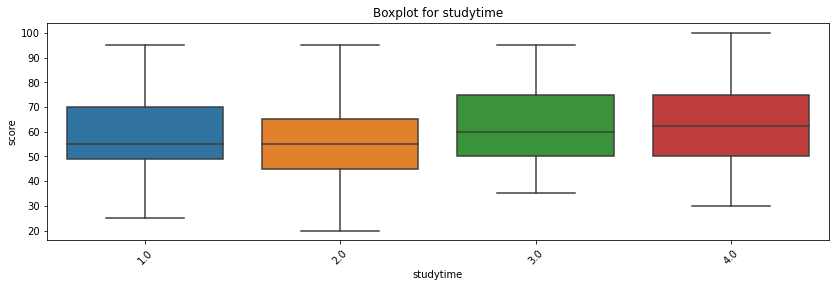

In [55]:
get_boxplot('studytime')

**Предварительный вывод:**
- Непустые значения 343 из 350. 2% - пустых значений.
- Пока очевидных выводов по данной колонке нет.

### 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
**Проверим пропуски**

In [56]:
empty_count('failures')

Параметр - failures
Всего значений - 350
Заполненных значений - 330
Пустых значений - 20
Пустых значений - 5.71%


**Посмотрим на категории**

In [57]:
empty_change('failures')
df.failures.value_counts()

0.0      273
1.0       38
empty     20
2.0       11
3.0        8
Name: failures, dtype: int64

**Построим boxplot**

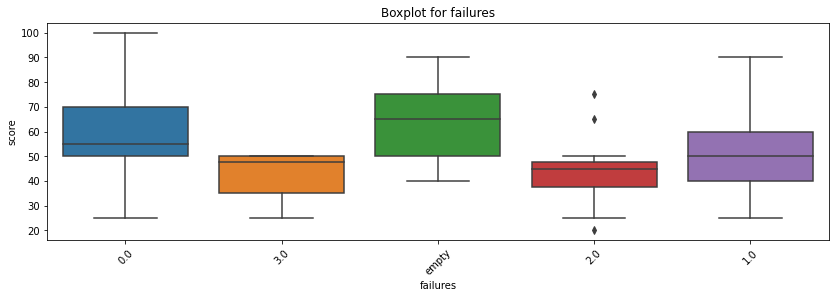

In [58]:
get_boxplot('failures')

**Предварительный вывод:**
- Непустые значения 322 из 350. 5.71% - пустых значений.
- Значения 4 (как в описании) отсутствует. Неописанные значения 0. Возможно проставили 0 вместо 4.
- Количество пустых значений превышает кол-во значений в двух заполненных признаках. Подавляющее большинство данных имеет значение 0.

**Вывод:**
- Колонка не представляет интереса для анализа.

In [59]:
df.drop(['failures'], inplace=True, axis=1)

### 16 schoolsup — дополнительная образовательная поддержка (yes или no)
**Проверим пропуски**

In [60]:
empty_count('schoolsup')

Параметр - schoolsup
Всего значений - 350
Заполненных значений - 342
Пустых значений - 8
Пустых значений - 2.29%


**Посмотрим на категории**

In [61]:
empty_change('schoolsup')
df.schoolsup.value_counts()

no       294
yes       48
empty      8
Name: schoolsup, dtype: int64

**Построим boxplot**

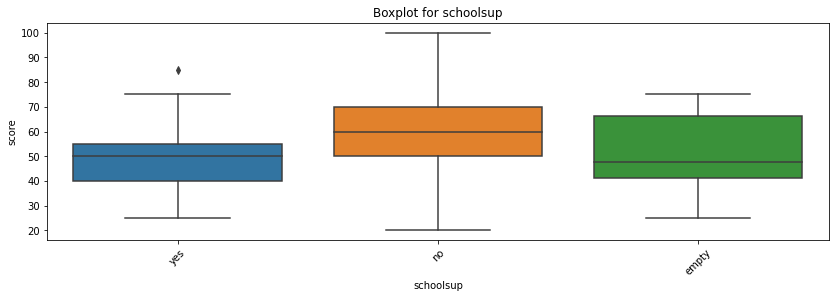

In [62]:
get_boxplot('schoolsup')

**Предварительный вывод:**
- Непустые значения 322 из 350. 2.29% - пустых значений.
- Когда дополнительной образовательной поддержки нет в среднем экзамен сдается лучше, но и разброс оценок больше.

### 17 famsup — семейная образовательная поддержка (yes или no)
**Проверим пропуски**

In [63]:
empty_count('famsup')

Параметр - famsup
Всего значений - 350
Заполненных значений - 314
Пустых значений - 36
Пустых значений - 10.29%


**Посмотрим на категории**

In [64]:
empty_change('famsup')
df.famsup.value_counts()

yes      196
no       118
empty     36
Name: famsup, dtype: int64

**Построим boxplot**

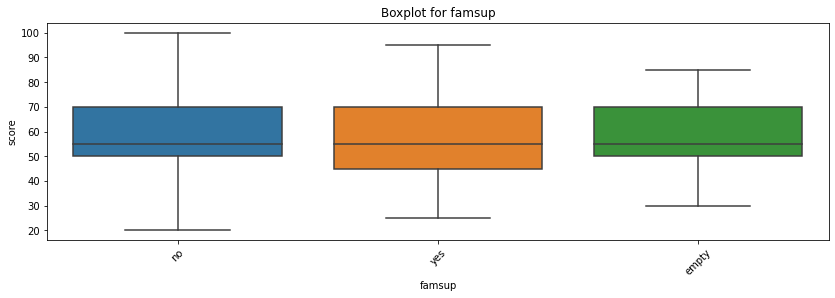

In [65]:
get_boxplot('famsup')

**Предварительный вывод:**
- Непустые значения 314 из 350. 10.29% - пустых значений.
- Довольно много незаполненных значений.
- Судя по графикам, семейная образовательная поддержка значимого влияния на результат не оказывает.

**Вывод:**
- Столбец можно удалять:

In [66]:
df.drop(['famsup'], inplace=True, axis=1)

### 18 paid — дополнительные платные занятия по математике (yes или no)
**Проверим пропуски**

In [67]:
empty_count('paid')

Параметр - paid
Всего значений - 350
Заполненных значений - 314
Пустых значений - 36
Пустых значений - 10.29%


**Посмотрим на категории**

In [68]:
empty_change('paid')
df.paid.value_counts()

no       168
yes      146
empty     36
Name: paid, dtype: int64

**Построим boxplot**

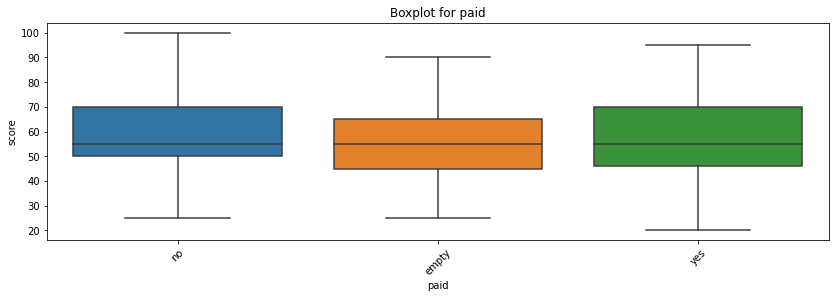

In [69]:
get_boxplot('paid')

**Предварительный вывод:**
- Непустые значения 314 из 350. 10.29% - пустых значений.
- Довольно много незаполненных значений.
- Судя по графикам, дополнительные платные занятия значимого влияния на результат не оказывает.

**Вывод:**
- Столбец можно удалять:

In [70]:
df.drop(['paid'], inplace=True, axis=1)

### 19 activities — дополнительные внеучебные занятия (yes или no)
**Проверим пропуски**

In [71]:
empty_count('activities')

Параметр - activities
Всего значений - 350
Заполненных значений - 338
Пустых значений - 12
Пустых значений - 3.43%


**Посмотрим на категории**

In [72]:
empty_change('activities')
df.activities.value_counts()

yes      172
no       166
empty     12
Name: activities, dtype: int64

**Построим boxplot**

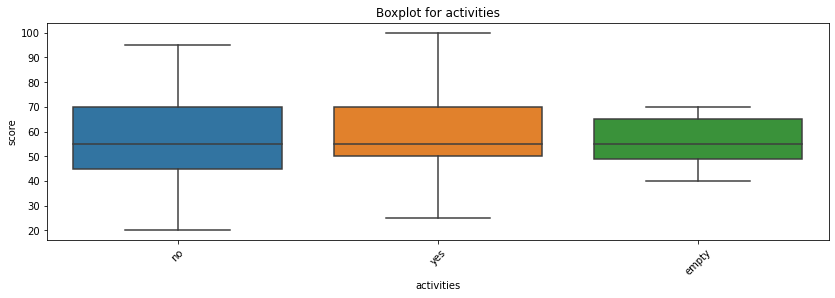

In [73]:
get_boxplot('activities')

**Предварительный вывод:**
- Непустые значения 338 из 350. 3.43% - пустых значений.
- При примерно равном медианном значении общий уровень оценок при наличии дополнительных внеучебных занятий выше (выше среднее значение, 1 и 3 квартили).

### 20 nursery — посещал детский сад (yes или no)
**Проверим пропуски**

In [74]:
empty_count('nursery')

Параметр - nursery
Всего значений - 350
Заполненных значений - 338
Пустых значений - 12
Пустых значений - 3.43%


**Посмотрим на категории**

In [75]:
empty_change('nursery')
df.nursery.value_counts()

yes      272
no        66
empty     12
Name: nursery, dtype: int64

**Построим boxplot**

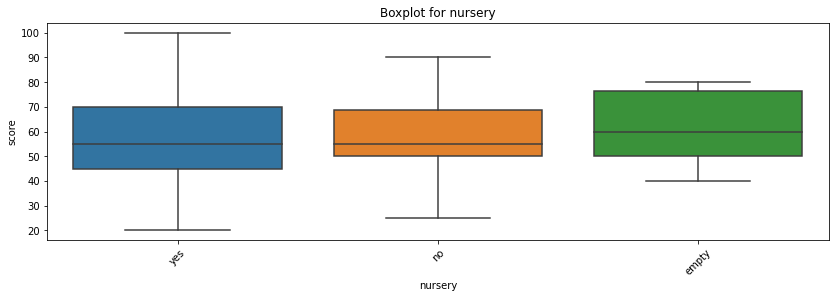

In [76]:
get_boxplot('nursery')

**Предварительный вывод:**
- Непустые значения 338 из 350. 3.43% - пустых значений.
- Пока вывод о значимости параметра сделать нельзя.

### Неописанный столбец 'studytime, granular'
Судя по названию, возможно есть корреляция со столбцом studytime.

**Проверим корреляцию:**

In [77]:
df.corr().loc['studytime', 'studytime, granular']

-0.9999999999999991

**Вывод:**
- Практически 100% корреляция, столбец можно удалить.

In [78]:
df.drop(['studytime, granular'], inplace=True, axis=1)

### 21 higher — хочет получить высшее образование (yes или no)
**Проверим пропуски**

In [79]:
empty_count('higher')

Параметр - higher
Всего значений - 350
Заполненных значений - 332
Пустых значений - 18
Пустых значений - 5.14%


**Посмотрим на категории**

In [80]:
empty_change('higher')
df.higher.value_counts()

yes      320
empty     18
no        12
Name: higher, dtype: int64

**Построим boxplot**

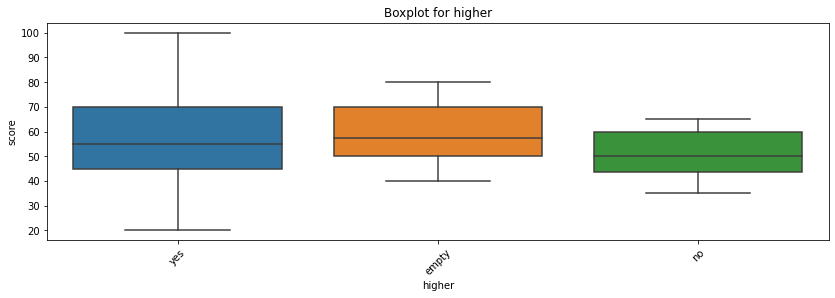

In [81]:
get_boxplot('higher')

**Предварительный вывод:**
- Непустые значения 343 из 350. 5.14% - пустых значений.
- Уровень сдачи экзамена у тех, кто не хочет получать высшее образование ниже.
- Значений 'no' недостаточно для учета в анализе. Их меньше, чем незаполненных значений. И всего 3% от заполненных.

**Вывод:**
- Параметр можно удалять.

In [82]:
df.drop(['higher'], inplace=True, axis=1)

### 22 internet — наличие интернета дома (yes или no)
**Проверим пропуски**

In [83]:
empty_count('internet')

Параметр - internet
Всего значений - 350
Заполненных значений - 321
Пустых значений - 29
Пустых значений - 8.29%


**Посмотрим на категории**

In [84]:
empty_change('internet')
df.internet.value_counts()

yes      273
no        48
empty     29
Name: internet, dtype: int64

**Построим boxplot**

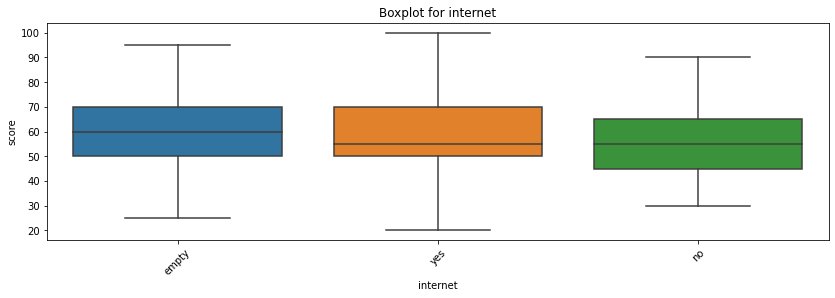

In [85]:
get_boxplot('internet')

**Предварительный вывод:**
- Непустые значения 321 из 350. 8.29% - пустых значений.
- При примерно равной медиане, уровень сдачи экзамена у тех, у кого есть интернет выше. Разброс тоже выше из-за большего количества значений.

### 23 romantic — в романтических отношениях (yes или no)
**Проверим пропуски**

In [86]:
empty_count('romantic')

Параметр - romantic
Всего значений - 350
Заполненных значений - 321
Пустых значений - 29
Пустых значений - 8.29%


**Посмотрим на категории**

In [87]:
empty_change('romantic')
df.romantic.value_counts()

no       218
yes      103
empty     29
Name: romantic, dtype: int64

**Построим boxplot**

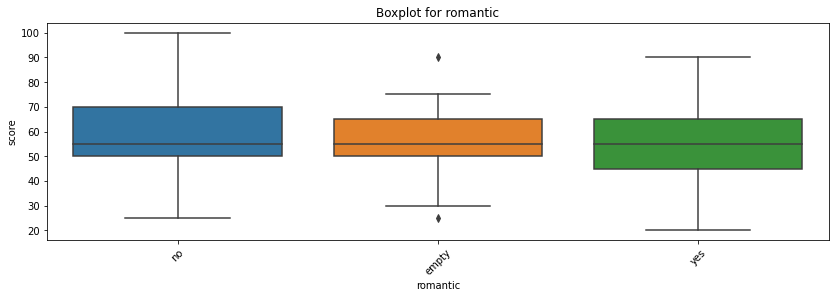

In [88]:
get_boxplot('romantic')

**Предварительный вывод:**
- Непустые значения 321 из 350. 8.29% - пустых значений.
- При примерно одинаковом медианном значении, общий уровень оценки выше у тех, у кого нет романтических отношений.

### 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
**Проверим пропуски**

In [89]:
empty_count('famrel')

Параметр - famrel
Всего значений - 350
Заполненных значений - 326
Пустых значений - 24
Пустых значений - 6.86%


**Посмотрим на распределение**

count    326.000000
mean       3.935583
std        0.920948
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

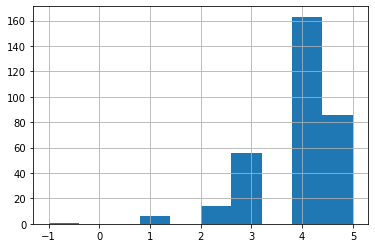

In [90]:
df.famrel.hist()
df.famrel.describe()

Есть выброс - значение -1. Скорее всего, хотели написать значение 1.

**Исправим ошибку:**

In [91]:
df.at[df[df.famrel == -1]['famrel'].index[0], 'famrel'] = 1

**Предварительный вывод:**
- Непустые значения 326 из 350. 6,68% - пустых значений.
- Основные значения от 3 до 5.
- Окончательный вывод по параметру пока сделать нельзя.

### 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
**Проверим пропуски**

In [92]:
empty_count('freetime')

Параметр - freetime
Всего значений - 350
Заполненных значений - 342
Пустых значений - 8
Пустых значений - 2.29%


**Посмотрим на распределение**

count    342.000000
mean       3.228070
std        1.001773
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

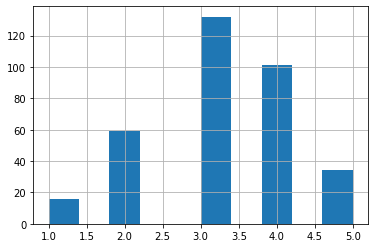

In [93]:
df.freetime.hist()
df.freetime.describe()

**Предварительный вывод:**
- Непустые значения 342 из 350. 2.29% - пустых значений.
- Выбросов нет.
- Окончательный вывод по параметру пока сделать нельзя.

### 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
**Проверим пропуски**

In [94]:
empty_count('goout')

Параметр - goout
Всего значений - 350
Заполненных значений - 344
Пустых значений - 6
Пустых значений - 1.71%


**Посмотрим на распределение**

count    344.000000
mean       3.081395
std        1.090271
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

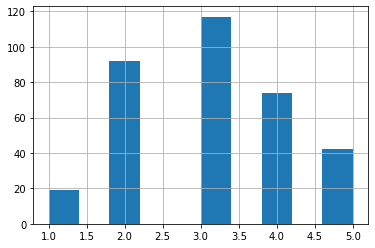

In [95]:
df.goout.hist()
df.goout.describe()

**Предварительный вывод:**
- Непустые значения 344 из 350. 1.71% - пустых значений.
- Выбросов нет.
- Окончательный вывод по параметру пока сделать нельзя.

### 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
**Проверим пропуски**

In [96]:
empty_count('health')

Параметр - health
Всего значений - 350
Заполненных значений - 337
Пустых значений - 13
Пустых значений - 3.71%


**Посмотрим на распределение**

count    337.000000
mean       3.525223
std        1.410036
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

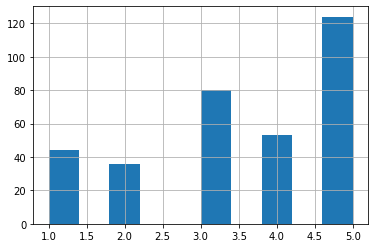

In [97]:
df.health.hist()
df.health.describe()

**Предварительный вывод:**
- Непустые значения 337 из 350. 3.71% - пустых значений.
- Выбросов нет.
- Окончательный вывод по параметру пока сделать нельзя.

### 28 absences — количество пропущенных занятий
**Проверим пропуски**

In [98]:
empty_count('absences')

Параметр - absences
Всего значений - 350
Заполненных значений - 340
Пустых значений - 10
Пустых значений - 2.86%


**Посмотрим на распределение**

count    340.000000
mean       8.082353
std       24.772100
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

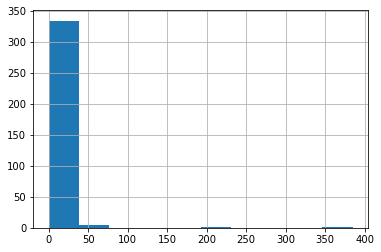

In [99]:
df.absences.hist()
df.absences.describe()

**Предварительный вывод:**
- Непустые значения 340 из 350. 2.86% - пустых значений.
- Есть выбросы.
- Очевидно, что нижняя граница данного параметра 0.
- Отфильтруем значения выше perc75 + 1.5*IQR

**Посмотрим параметр после преобразования:**

count    313.000000
mean       4.651757
std        4.390053
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       17.000000
Name: absences, dtype: float64

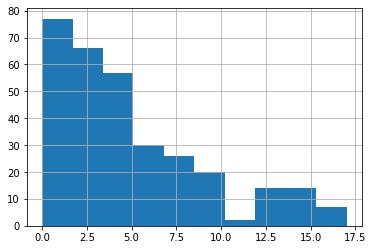

In [100]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
df = df.loc[df.absences <= perc75 + 1.5*IQR].reset_index()
df.absences.hist()
df.absences.describe()

## Посмотрим корреляцию числовых столбцов

In [101]:
df.corr()

,index,age,Medu,Fedu,studytime,famrel,freetime,goout,health,absences,score
index,1.000000,0.774371,-0.128685,-0.084445,0.070372,-0.028292,0.016233,0.127616,-0.066609,0.073790,-0.016551
age,0.774371,1.000000,-0.125266,-0.113511,0.041821,0.035559,-0.003455,0.128902,-0.002041,0.172501,-0.113632
Medu,-0.128685,-0.125266,1.000000,0.606605,0.078056,-0.000809,0.043170,0.042754,-0.049695,0.086354,0.181704
Fedu,-0.084445,-0.113511,0.606605,1.000000,-0.030673,-0.002218,0.009609,0.003810,-0.001898,-0.009282,0.122913
studytime,0.070372,0.041821,0.078056,-0.030673,1.000000,0.067270,-0.127733,-0.010020,-0.105620,-0.046789,0.134683
famrel,-0.028292,0.035559,-0.000809,-0.002218,0.067270,1.000000,0.162838,0.038002,0.115662,-0.118508,0.085064
freetime,0.016233,-0.003455,0.043170,0.009609,-0.127733,0.162838,1.000000,0.293886,0.059999,0.083511,0.000355
goout,0.127616,0.128902,0.042754,0.003810,-0.010020,0.038002,0.293886,1.000000,0.025202,0.155655,-0.196364
health,-0.066609,-0.002041,-0.049695,-0.001898,-0.105620,0.115662,0.059999,0.025202,1.000000,-0.019525,-0.064388
absences,0.073790,0.172501,0.086354,-0.009282,-0.046789,-0.118508,0.083511,0.155655,-0.019525,1.000000,-0.225707


**Предварительный вывод:**

Средний уровень корреляции с оценкой за экзамен наблюдается у следующих параметров:
- age - возраст (отрицательная корреляция).
- Medu и Fedu - уровень образования родителей. При этом уровень образования матери больше влияет на оценку, чем уровень образования отца.
- studytime - время на учёбу помимо школы.
- goout - проведение времени с друзьями (отрицательная корреляция).

### Корреляция между Medu и Fedu около 61%.
Можно заполнить пропуски в Fedu из Medu и наоборот.

In [102]:
for i in range(0, len(df)):
    if pd.isnull(df.loc[i]['Medu']) & pd.isnull(df.loc[i]['Fedu']):
        continue
    if pd.isnull(df.loc[i]['Medu']) | pd.isnull(df.loc[i]['Fedu']):
        if pd.isnull(df.loc[i]['Medu']):
            df.at[i, 'Medu'] = df.loc[i]['Fedu']
        else:
            df.at[i, 'Fedu'] = df.loc[i]['Medu']

**Смотрим получившиеся корреляции**

In [103]:
df[['Medu', 'Fedu']].corr()

,Medu,Fedu
Medu,1.000000,0.632784
Fedu,0.632784,1.000000


**Вывод:**
- Корреляция между Medu и Fedu стала 63%.
- Возможно, стоит избавиться от одного из столбцов, либо объединить данные из Medu и Fedu в один столбец.

**Проверим:**

In [104]:
df['Medu_Fedu'] = df['Medu'] + df['Fedu']
df[['Medu', 'Fedu', 'Medu_Fedu', 'score']].corr()

,Medu,Fedu,Medu_Fedu,score
Medu,1.000000,0.632784,0.904684,0.189089
Fedu,0.632784,1.000000,0.902399,0.120545
Medu_Fedu,0.904684,0.902399,1.000000,0.171557
score,0.189089,0.120545,0.171557,1.000000


**Вывод:**

Результат объединения:
- Корреляция между Medu и score 19%.
- Корреляция между Fedu и score 12%.
- Корреляция между объединенным столбцом Medu_Fedu и score 17%.
- Для минимизации кол-ва столбцов можно оставить один объединенный столбец.
- Для более точной модели, лучше оставить два отдельных столбца, т. к. разница влияний между ними на итоговый результат велика.

**Удалим лишний параметр:**

In [105]:
df.drop(['Medu_Fedu'], inplace=True, axis=1)

## Протестируем все колонки, как категориальные признаки (т. к. их можно назвать таковыми).
**Тест Стьюдента**

In [106]:
for col in df.columns:
    student_test(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки score


**Предварительный вывод:**

Найдены статистически значимые различия для колонок:
sex, age, address, Medu, Fedu, studytime, schoolsup, goout


## Сформируем итоговый дата фрейм для модели

Medu и Fedu можно будет потом объединить, в случае необходимости сокращения столбцов.


In [107]:
df_for_model = df.loc[:, ['sex', 'age', 'address', 'Medu',
                          'Fedu', 'studytime', 'schoolsup', 'goout']]

df_for_model.head(10)

,sex,age,address,Medu,Fedu,studytime,schoolsup,goout
0,F,18,U,4.0,4.0,2.0,yes,4.0
1,F,17,U,1.0,1.0,2.0,no,3.0
2,F,15,U,1.0,1.0,2.0,yes,2.0
3,F,15,U,4.0,2.0,3.0,no,2.0
4,F,16,U,3.0,3.0,2.0,no,2.0
5,M,16,U,4.0,3.0,2.0,no,2.0
6,M,16,empty,2.0,2.0,2.0,no,4.0
7,F,17,U,4.0,4.0,2.0,yes,4.0
8,M,15,U,3.0,2.0,2.0,no,2.0
9,M,15,U,3.0,4.0,2.0,no,1.0


# Вывод
- Проведено предварительное исследование влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике.
- Выявлены значимые параметры, влияющие на итоговую оценку.

## Краткая информация о данных
-	Данные достаточно чистые.
-	В данных мало пустых значений.
-	В основном информация корректно и однотипно заполнена. Ошибок немного.
-	Предварительные выводы о параметрах сделаны при их последовательном исслодловании.

## Этапы работы над проектом
- Проведен предварительный анализ дата фрейма. Выявлен неописанный параметр **"studytime, granular"**. Проверены типы данных в столбцах и количество пропусков.
- Сформированы функции для заполнения пустых ячеек, подсчета пропусков, формирования диаграмм и проверки значимости параметров с помощью теста Стьюдента.
- Каждый признак последовательно проверен на количество и процентную долю пропусков, наличие выбросов, значения параметров, влияние параметра на итоговую оценку с помощью диаграмм boxplot и таблиц корреляции.

### В ходе предварительного анализа параметров сделаны следующие выводы и действия:
- Для основного параметра **score** удалены незаполненные и нулевые значения.
- В школе GP выше разброс оценок, но общий уровень подготовки выше, чем в школе MS.
- Мальчики в среднем лучше сдают экзамен по математике.
- Диапазон возраста учеников сокращен до интервала от 15 до 20 лет, в связи с недостаточным количеством данных для анализа в полном интервале исследования.
- Удален параметр ** Pstatus — статус совместного жилья родителей**, из-за большого количества пропусков и отсутствия значимого влияния на конечный балл.
- Найдены выбросы в одной из категорий параметра ** 7 Medu — образование матери**
- Найдена и исправлена ошибка в заполнении параметра ** 8 Fedu — образование отца** 
- Уровень сдачи экзамена в среднем самый высокий, если сфера работы матери 'health' - сфера здравоохранение.
- Баллы у учеников, у отца которых образование 'teacher' - учитель, в среднем самые высокие.
- Если опекун отец, в среднем экзамен сдается лучше и разброс оценок меньше.
- Удален параметр ** 13 traveltime — время в пути до школы**, из-за большого количества пропусков и отсутствия значимого влияния параметра на итоговый результат.
- Удален параметр ** 15 failures — количество внеучебных неудач**, т. к. количество пустых значений превышает кол-во значений в двух заполненных признаках. Подавляющее большинство данных имеет значение 0.
- Когда дополнительной образовательной поддержки нет в среднем экзамен сдается лучше, но и разброс оценок больше.
- Удален параметр ** 17 famsup — семейная образовательная поддержка**, т. к. довольно много незаполненных значений и судя по графикам, семейная образовательная поддержка значимого влияния на результат не оказывает.
- Удален параметр ** 18 paid — дополнительные платные занятия по математике**, т. к., как не странно, судя по графикам, дополнительные платные занятия значимого влияния на результат не оказывает и довольно много пропущенных значений.
- При примерно равном медианном значении, общий уровень оценок при наличии дополнительных внеучебных занятий выше (выше среднее значение, 1 и 3 квартили).
- Проанализирован неописанный параметр ** studytime, granular**. Он удален из дата сета из-за практически 100% корреляции с параметром studytime.
- Уровень сдачи экзамена у тех, кто не хочет получать высшее образование ниже. Данный параметр из дата сета удален, т. к. значений 'no' недостаточно для учета в анализе. Их меньше, чем незаполненных значений. И всего 3% от заполненных.
- При примерно равной медиане, уровень сдачи экзамена у тех, у кого есть интернет выше. Разброс тоже выше из-за большего количества значений.
- При примерно одинаковом медианном значении, общий уровень оценки выше у тех, у кого нет романтических отношений.
- Исправлена ошибка заполнения параметра ** 24 famrel — семейные отношения**
- Убраны выбросы в параметре ** 28 absences — количество пропущенных занятий**

### Проведен корреляционный анализ данных
Выявлен средний уровень корреляции с оценкой за экзамен у следующих параметров:
- age - возраст (отрицательная корреляция).
- Medu и Fedu - уровень образования родителей. При этом уровень образования матери больше влияет на оценку, чем уровень образования отца.
- studytime - время на учёбу помимо школы.
- goout - проведение времени с друзьями (отрицательная корреляция).


- Выявлена высокая корреляция между Medu и Fedu.
- Заполнены пропуски в параметрах Medu и Fedu на основании значений друг друга.
- Создан дополнительный признак **Образование родителей** на основании Medu и Fedu.
- Дополнительный признак проверен по степени влияния на итоговую оценку.
- Принято решение оставить признаки Medu и Fedu и удалить параметр **Образование родителей.** из-за разницы в корреляциях Medu и Fedu.

### Тест Стьюдента
- Проведен анализ номинативных переменных на статистическую разницу в распределении оценок (тест Стьюдента).
- Найдены статистически значимые различия для колонок: sex, age, address, Medu, Fedu, studytime, schoolsup, goout.

## Итог
### Сформирован новый дата фрейм для модели
Новый дата фрейм включает значимые параметры: sex, age, address, Medu, Fedu, studytime, schoolsup, goout.

